# CNN Pilot Implementation DEMO

# Importing libraries

Mounting Google Drive to our Shared EmotionDetectionProject folder

In [37]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
#Directory section
import pandas as pd
import numpy as np
import os
import librosa as lib
import librosa.display
import shutil
import matplotlib.pyplot as plt
import zipfile
from sklearn.preprocessing import LabelEncoder
from pathlib import Path
import seaborn as sns
import cv2

#CNN section
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import activations
from tensorflow.keras.utils import model_to_dot
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, activations
from tensorflow.python.keras.callbacks import ModelCheckpoint


# Spectrograms and Mel-Spectrograms functions

In [39]:
FRAME_SIZE = 1024
HOP_SIZE = 512

In [40]:
def get_mel_spectrogram(wav_file, destination_to_save):
    scale , sr = librosa.load(wav_file, sr = 22050)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(scale, hop_length=HOP_SIZE)), ref=np.max)
    librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=HOP_SIZE, x_axis='time')
    plt.axis('off')
    plt.savefig(destination_to_save, format='png', bbox_inches='tight')

In [41]:
def get_spectrogram(wav_file, destination_to_save):
    scale , sr = librosa.load(wav_file, sr = 22050)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(scale)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
    plt.axis('off')
    plt.savefig(destination_to_save, format='png', bbox_inches='tight')

Plotting Spectrogram and Mel-Spectrogram of an angry audio file 

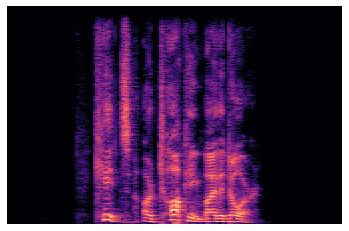

In [42]:
#Spectrogram
get_spectrogram('/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/DataDivided/Train/Anger/03-01-05-01-01-01-01.wav','/content/drive/MyDrive/EmotionDetectionProject/Code/Plots/SpectroEx')

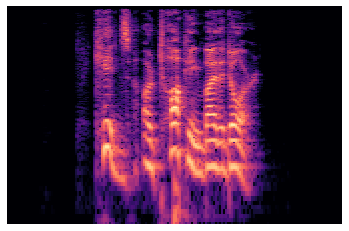

In [43]:
#Mel-spectrogram
get_mel_spectrogram('/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/DataDivided/Train/Anger/03-01-05-01-01-01-01.wav','/content/drive/MyDrive/EmotionDetectionProject/Code/Plots/MelspectroEx')

# Organizing directories

In [44]:
# parent_path = "/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial"
# emotion_number_and_types = ["Train", "Test"]
# extraction_types = ["Spectrogram", "Melspectrogram"]
# emotions_8 = ["Anger", "Disgust", "Fear", "Happy", "Neutral", "Sad", 'Surprise', 'Calm']
# mode = 0o777

Creating directories

In [45]:
# for emotion_number_and_type in emotion_number_and_types:
#     dir_to_create = os.path.join(parent_path, emotion_number_and_type)
#     print(dir_to_create)
    
#     for extraction_type in extraction_types:
#         dir_to_create = os.path.join(dir_to_create, extraction_type)
#         print(dir_to_create)
#         os.mkdir(dir_to_create, mode)
    
    
#         for emotion in emotions_8:
#             print(dir_to_create)
#             os.mkdir(os.path.join(dir_to_create, emotion), mode)
        
#         dir_to_create = os.path.dirname(dir_to_create)

Splitting audio files into train & test  directories

Train directory

In [46]:
# source_folder = "/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS"
# destination_folder = "/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/DataDivided"


# for folder_name in os.listdir(source_folder) :
#     # construct full file path
#     if folder_name != "audio_speech_actors_01-24":
#       current_folder = source_folder + '/' + folder_name
#       #print(current_folder)
#       for file_name in os.listdir(current_folder):
#           # if file_name.split('-')[5] == '01':
#           #     continue
#           print(file_name)
#           file_class = file_name.split('-')[2]
#           #print(file_class)
#           source = current_folder + '/' + file_name
#           print(source)

#           if file_class == '05':
#               destination = destination_folder + '/Anger'
#               shutil.copy2(source, destination)
#               #print(file_class)
#           elif file_class == '07':
#               destination = destination_folder + '/Disgust'
#               #print(destination)
#               shutil.copy2(source, destination)
#               #print(file_class)
#           elif file_class == '06':
#               destination = destination_folder + '/Fear'
#               shutil.copy2(source, destination)
#               #print(file_class)
#           elif file_class == '03':
#               destination = destination_folder + '/Happy'
#               shutil.copy2(source, destination)
#               #print(file_class)
#           elif file_class == '01':
#               destination = destination_folder + '/Neutral'
#               shutil.copy2(source, destination)
#               #print(file_class)
#           elif file_class == '04':
#               destination = destination_folder + '/Sad'
#               shutil.copy2(source, destination)
#               #print(file_class)
#           elif file_class == '02':
#               destination = destination_folder + '/Calm'
#               shutil.copy2(source,destination)
#               #print(file_class)
#           elif file_class == '08':
#               destination = destination_folder + '/Surprise'
#               shutil.copy2(source, destination)
#               #print(file_class)

Test directory 

*  Test split of actors 23,03,02,24,09
*  5 actors; 3 male and 2 female


In [47]:
# source_folder = "/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/DataDivided"
# ##source_folder = "/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/DataDivided/Train"
# destination_folder = "/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/DataDivided/Test"

# for folder_name in os.listdir(source_folder):
#   if folder_name!='Train' and folder_name!='Test':
#     current_folder = source_folder + '/' + folder_name
#     for file_name in os.listdir(current_folder):
#         print(file_name)
#         source = current_folder + '/' + file_name
#         actor_id_wav = file_name.split('-')[6] #5 people for test 3 male and 2 female
#         actor_id = actor_id_wav.split('.')[0]
#         if actor_id in ['23', '03', '02', '24', '09']:

#             if folder_name == 'Anger':
#                 destination = destination_folder + '/Anger/'
#                 shutil.move(source, destination)
#             elif folder_name == 'Disgust':
#                 destination = destination_folder + '/Disgust/'
#                 shutil.move(source, destination)
#             elif folder_name == 'Fear':
#                 destination = destination_folder + '/Fear/'
#                 shutil.move(source, destination)
#             elif folder_name == 'Happy':
#                 destination = destination_folder + '/Happy/'
#                 shutil.move(source, destination)
#             elif folder_name == 'Neutral':
#                 destination = destination_folder + '/Neutral/'
#                 shutil.move(source, destination)
#             elif folder_name == 'Sad':
#                 destination = destination_folder + '/Sad/'
#                 shutil.move(source, destination)
#             elif folder_name == 'Calm':
#                 destination = destination_folder + '/Calm/'
#                 shutil.move(source, destination)
#             elif folder_name == 'Surprise':
#                 destination = destination_folder + '/Surprise/'
#                 shutil.move(source, destination)

Filling Train & Test image directories with Spectrograms & Mel-spectrograms

In [48]:
# source_folder = "/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/DataDivided"
# destination_folder_mels = "/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial"
# destination_folder_spec = "/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial"

Train 

In [49]:
# # for emotion_number_and_type in emotion_number_and_types:
# emotion_number_and_type = 'Train'
# for folder_name in os.listdir(source_folder + '/' + emotion_number_and_type):
#     current_folder = source_folder + '/' + emotion_number_and_type + '/' + folder_name
#     # print(folder_name)
#     if folder_name == 'Anger' or folder_name == 'Disgust' or folder_name == 'Fear' or folder_name == 'Happy' or folder_name == 'Neutral' or folder_name == 'Sad' or folder_name == 'Surprise' or folder_name == 'Calm':
#         for file_name in os.listdir(current_folder):

#             source = current_folder + '/' + file_name

#             if folder_name == 'Anger':
#                 destination = destination_folder_mels + '/' + emotion_number_and_type + '/Melspectrogram/Anger/' + file_name + '.png'
#                 destination_spec = destination_folder_spec + '/' + emotion_number_and_type + '/Spectrogram/Anger/' + file_name + '.png'
#                 spec_spectrogram = get_spectrogram(source, destination_spec)
#                 mel_spectrogram = get_mel_spectrogram(source, destination)
#                 plt.close('all')
            
#             elif folder_name == 'Disgust':
#                 destination = destination_folder_mels + '/' + emotion_number_and_type + '/Melspectrogram/Disgust/' + file_name + '.png'
#                 destination_spec = destination_folder_spec + '/' + emotion_number_and_type + '/Spectrogram/Disgust/' + file_name + '.png'
#                 spec_spectrogram = get_spectrogram(source, destination_spec)
#                 mel_spectrogram = get_mel_spectrogram(source, destination)
#                 plt.close('all')

#             elif folder_name == 'Fear':
#                 destination = destination_folder_mels + '/' + emotion_number_and_type + '/Melspectrogram/Fear/' + file_name + '.png'
#                 destination_spec = destination_folder_spec + '/' + emotion_number_and_type + '/Spectrogram/Fear/' + file_name + '.png'
#                 spec_spectrogram = get_spectrogram(source, destination_spec)
#                 mel_spectrogram = get_mel_spectrogram(source, destination)
#                 plt.close('all')

#             if folder_name == 'Happy':
#                 destination = destination_folder_mels + '/' + emotion_number_and_type + '/Melspectrogram/Happy/' + file_name + '.png'
#                 destination_spec = destination_folder_spec + '/' + emotion_number_and_type + '/Spectrogram/Happy/' + file_name + '.png'
#                 spec_spectrogram = get_spectrogram(source, destination_spec)
#                 mel_spectrogram = get_mel_spectrogram(source, destination)
#                 plt.close('all')

#             elif folder_name == 'Neutral':
#                 destination = destination_folder_mels + '/' + emotion_number_and_type + '/Melspectrogram/Neutral/' + file_name + '.png'
#                 destination_spec = destination_folder_spec + '/' + emotion_number_and_type + '/Spectrogram/Neutral/' + file_name + '.png'
#                 spec_spectrogram = get_spectrogram(source, destination_spec)
#                 mel_spectrogram = get_mel_spectrogram(source, destination)
#                 plt.close('all')

#             if folder_name == 'Sad':
#                 destination = destination_folder_mels + '/' + emotion_number_and_type + '/Melspectrogram/Sad/' + file_name + '.png'
#                 destination_spec = destination_folder_spec + '/' + emotion_number_and_type + '/Spectrogram/Sad/' + file_name + '.png'
#                 spec_spectrogram = get_spectrogram(source, destination_spec)
#                 mel_spectrogram = get_mel_spectrogram(source, destination)
#                 plt.close('all')
                
#             if folder_name == 'Surprise':
#                 destination = destination_folder_mels + '/' + emotion_number_and_type + '/Melspectrogram/Surprise/' + file_name + '.png'
#                 destination_spec = destination_folder_spec + '/' + emotion_number_and_type + '/Spectrogram/Surprise/' + file_name + '.png'
#                 spec_spectrogram = get_spectrogram(source, destination_spec)
#                 mel_spectrogram = get_mel_spectrogram(source, destination)
#                 plt.close('all')

#             if folder_name == 'Calm':
#                 destination = destination_folder_mels + '/' + emotion_number_and_type + '/Melspectrogram/Calm/' + file_name + '.png'
#                 destination_spec = destination_folder_spec + '/' + emotion_number_and_type + '/Spectrogram/Calm/' + file_name + '.png'
#                 spec_spectrogram = get_spectrogram(source, destination_spec)
#                 mel_spectrogram = get_mel_spectrogram(source, destination)
#                 plt.close('all')

Test

In [50]:
# # for emotion_number_and_type in emotion_number_and_types:
# emotion_number_and_type = 'Test'
# for folder_name in os.listdir(source_folder + '/' + emotion_number_and_type):
#     current_folder = source_folder + '/' + emotion_number_and_type + '/' + folder_name
#     # print(folder_name)
#     if folder_name == 'Anger' or folder_name == 'Disgust' or folder_name == 'Fear' or folder_name == 'Happy' or folder_name == 'Neutral' or folder_name == 'Sad' or folder_name == 'Surprise' or folder_name == 'Calm':
#         for file_name in os.listdir(current_folder):

#             source = current_folder + '/' + file_name

#             if folder_name == 'Anger':
#                 destination = destination_folder_mels + '/' + emotion_number_and_type + '/Melspectrogram/Anger/' + file_name + '.png'
#                 destination_spec = destination_folder_spec + '/' + emotion_number_and_type + '/Spectrogram/Anger/' + file_name + '.png'
#                 spec_spectrogram = get_spectrogram(source, destination_spec)
#                 mel_spectrogram = get_mel_spectrogram(source, destination)
#                 plt.close('all')
            
#             if folder_name == 'Disgust':
#                 destination = destination_folder_mels + '/' + emotion_number_and_type + '/Melspectrogram/Disgust/' + file_name + '.png'
#                 destination_spec = destination_folder_spec + '/' + emotion_number_and_type + '/Spectrogram/Disgust/' + file_name + '.png'
#                 spec_spectrogram = get_spectrogram(source, destination_spec)
#                 mel_spectrogram = get_mel_spectrogram(source, destination)
#                 plt.close('all')

#             if folder_name == 'Fear':
#                 destination = destination_folder_mels + '/' + emotion_number_and_type + '/Melspectrogram/Fear/' + file_name + '.png'
#                 destination_spec = destination_folder_spec + '/' + emotion_number_and_type + '/Spectrogram/Fear/' + file_name + '.png'
#                 spec_spectrogram = get_spectrogram(source, destination_spec)
#                 mel_spectrogram = get_mel_spectrogram(source, destination)
#                 plt.close('all')

#             if folder_name == 'Happy':
#                 destination = destination_folder_mels + '/' + emotion_number_and_type + '/Melspectrogram/Happy/' + file_name + '.png'
#                 destination_spec = destination_folder_spec + '/' + emotion_number_and_type + '/Spectrogram/Happy/' + file_name + '.png'
#                 spec_spectrogram = get_spectrogram(source, destination_spec)
#                 mel_spectrogram = get_mel_spectrogram(source, destination)
#                 plt.close('all')

#             if folder_name == 'Neutral':
#                 destination = destination_folder_mels + '/' + emotion_number_and_type + '/Melspectrogram/Neutral/' + file_name + '.png'
#                 destination_spec = destination_folder_spec + '/' + emotion_number_and_type + '/Spectrogram/Neutral/' + file_name + '.png'
#                 spec_spectrogram = get_spectrogram(source, destination_spec)
#                 mel_spectrogram = get_mel_spectrogram(source, destination)
#                 plt.close('all')

#             if folder_name == 'Sad':
#                 destination = destination_folder_mels + '/' + emotion_number_and_type + '/Melspectrogram/Sad/' + file_name + '.png'
#                 destination_spec = destination_folder_spec + '/' + emotion_number_and_type + '/Spectrogram/Sad/' + file_name + '.png'
#                 spec_spectrogram = get_spectrogram(source, destination_spec)
#                 mel_spectrogram = get_mel_spectrogram(source, destination)
#                 plt.close('all')
                
#             if folder_name == 'Surprise':
#                 destination = destination_folder_mels + '/' + emotion_number_and_type + '/Melspectrogram/Surprise/' + file_name + '.png'
#                 destination_spec = destination_folder_spec + '/' + emotion_number_and_type + '/Spectrogram/Surprise/' + file_name + '.png'
#                 spec_spectrogram = get_spectrogram(source, destination_spec)
#                 mel_spectrogram = get_mel_spectrogram(source, destination)
#                 plt.close('all')

#             if folder_name == 'Calm':
#                 destination = destination_folder_mels + '/' + emotion_number_and_type + '/Melspectrogram/Calm/' + file_name + '.png'
#                 destination_spec = destination_folder_spec + '/' + emotion_number_and_type + '/Spectrogram/Calm/' + file_name + '.png'
#                 spec_spectrogram = get_spectrogram(source, destination_spec)
#                 mel_spectrogram = get_mel_spectrogram(source, destination)
#                 plt.close('all')


# Reading from directories & saving as .npy arrays

In [51]:
NUMBER_OF_EMOTIONS = 8
emotion_number_and_types = ["Test", "Train"]
emotions = ["Anger", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise", "Calm"]

In [52]:
def get_all_samples(parent_folder):
    all_samples = []
    labels = []
    for emotion in emotions:
      for p in os.listdir(os.path.join(parent_folder, emotion)):
        path = os.path.join(os.path.join(parent_folder, emotion), p)
        # print(path)
        image = cv2.imread(path)
        # print(image)
        all_samples.append(image)
        if emotion == 'Anger':  # 0
          labels.append(0)
        elif emotion == 'Disgust':  # 1
          labels.append(1)
        elif emotion == 'Fear':  # 2
          labels.append(2)
        elif emotion == 'Happy':  # 3
          labels.append(3)          
        elif emotion == 'Neutral':  # 4
          labels.append(4)
        elif emotion == 'Sad':  # 5
          labels.append(5)  
        elif emotion == 'Surprise':  # 6
          labels.append(6)
        elif emotion == 'Calm':  # 7
          labels.append(7)      
    return (all_samples, labels)

Loading spectrogram Train & test images & labels

In [53]:
# parent_folder = "/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/Train/Spectrogram"
# X_train, y_train = get_all_samples(parent_folder)

In [54]:
# parent_folder = "/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/Test/Spectrogram"
# X_test, y_test = get_all_samples(parent_folder)

Saving the loaded images and labels into X_train y_train X_test y_test .npy arrays

In [55]:
# np.save('/content/drive/MyDrive/EmotionDetectionProject/Datasets/X_train.npy', X_train)
# np.save('/content/drive/MyDrive/EmotionDetectionProject/Datasets/y_train.npy', y_train)

# np.save('/content/drive/MyDrive/EmotionDetectionProject/Datasets/X_test.npy', X_test)
# np.save('/content/drive/MyDrive/EmotionDetectionProject/Datasets/y_test.npy', y_test)

Loading Mel-spectrogram Train & test images & labels

In [56]:
# parent_folder = "/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/Train/Melspectrogram"
# X_train, y_train = get_all_samples(parent_folder)

In [57]:
# parent_folder = "/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/Test/Melspectrogram"
# X_test, y_test = get_all_samples(parent_folder)

Saving the loaded images and labels into X_train y_train X_test y_test .npy arrays

In [58]:
# np.save('/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/Melspectrograms train&test .npy /X_train.npy', X_train)
# np.save('/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/Melspectrograms train&test .npy /y_train.npy', y_train)

# np.save('/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/Melspectrograms train&test .npy /X_test.npy', X_test)
# np.save('/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/Melspectrograms train&test .npy /y_test.npy', y_test)

# CNN Implementation

Loading spectrograms or Mel-spectrograms 

*   spectro=1 load the spectrograms
*   spectro=0 load the melspectrograms



In [59]:
#spectro=1 load the spectrograms
#spectro=0 load the melspectrograms
spectro= 1

if spectro==1:
  #Loading spectrogram Train & test images & labels
  X_train = np.load('/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/Spectrograms train&test .npy /X_train.npy')
  y_train = np.load('/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/Spectrograms train&test .npy /y_train.npy')
  X_test = np.load('/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/Spectrograms train&test .npy /X_test.npy')
  y_test = np.load('/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/Spectrograms train&test .npy /y_test.npy')
else:
  #Loading Mel-spectrogram Train & test images & labels
  X_train = np.load('/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/Melspectrograms train&test .npy /X_train.npy')
  y_train = np.load('/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/Melspectrograms train&test .npy /y_train.npy')
  X_test = np.load('/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/Melspectrograms train&test .npy /X_test.npy')
  y_test = np.load('/content/drive/MyDrive/EmotionDetectionProject/Datasets/RAVDESS_Trial/Melspectrograms train&test .npy /y_test.npy')




In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1140, 231, 349, 3)
(300, 231, 349, 3)
(1140,)
(300,)


CNN architecture 


*   Adopting  CNN architecture of paper: "Speech Emotion Recognition from Spectrograms with Deep Convolutional
Neural Network
"
*   ref: A. M. Badshah, J. Ahmad, N. Rahim, and S. W. Baik, “Speech emotion recognition from spectrograms with deep convolutional neural network,” 2017 International Conference on Platform Technology and Service (PlatCon), 2017. 






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 88, 120)       43680     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 43, 120)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 43, 256)       768256    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 14, 256)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 14, 384)        885120    
                                                                 
 flatten (Flatten)           (None, 48384)             0

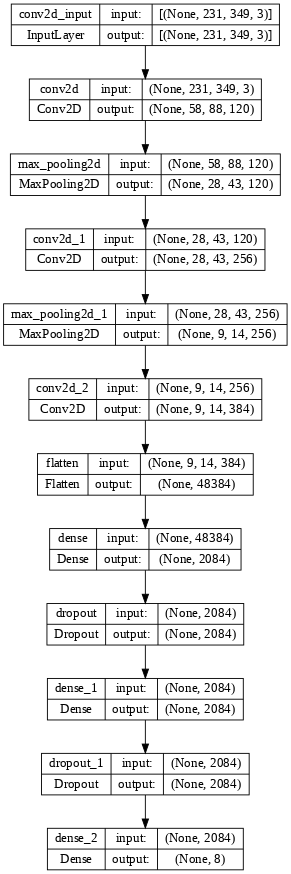

In [61]:

model = models.Sequential()
#Convolutional + pooling layers
model.add(layers.Conv2D(filters=120, kernel_size=11, strides=4, activation='relu', input_shape=(231, 349, 3), padding='same'))
model.add(layers.MaxPooling2D((3, 3),strides=2))
model.add(layers.Conv2D(256, (5, 5), strides=1, activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))
model.add(layers.Flatten()) 

#3 FC layers
model.add(layers.Dense(2084, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2084, activation='relu'))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(8, activation='softmax'))


print(model.summary())
plot_model(model, show_shapes=True,dpi = 65)

In [62]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [65]:
history = model.fit(X_train,  y_train, batch_size= 30, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
38/38 [==============================] - 235s 6s/step - loss: 24.5446 - accuracy: 0.1456 - val_loss: 2.0586 - val_accuracy: 0.1600
Epoch 2/10
38/38 [==============================] - 225s 6s/step - loss: 2.0527 - accuracy: 0.1816 - val_loss: 2.0273 - val_accuracy: 0.1700
Epoch 3/10
38/38 [==============================] - 229s 6s/step - loss: 2.0088 - accuracy: 0.2114 - val_loss: 1.9708 - val_accuracy: 0.2133
Epoch 4/10
38/38 [==============================] - 224s 6s/step - loss: 1.8943 - accuracy: 0.2825 - val_loss: 1.9309 - val_accuracy: 0.2733
Epoch 5/10
38/38 [==============================] - 226s 6s/step - loss: 1.8682 - accuracy: 0.2868 - val_loss: 1.9492 - val_accuracy: 0.2467
Epoch 6/10
38/38 [==============================] - 227s 6s/step - loss: 1.7844 - accuracy: 0.3175 - val_loss: 1.8631 - val_accuracy: 0.2900
Epoch 7/10
38/38 [==============================] - 224s 6s/step - loss: 1.6604 - accuracy: 0.3798 - val_loss: 1.8005 - val_accuracy: 0.2933
Epoch 8/10
3

In [66]:
results = model.evaluate(X_test, y_test, batch_size=1)
print("test loss, test acc:", results)

300/300 [==============================] - 32s 107ms/step - loss: 1.8469 - accuracy: 0.3633
test loss, test acc: [1.8469491004943848, 0.3633333444595337]
